In [11]:
#Imports
import numpy as np
import matplotlib.pyplot as plt
from maad import sound, features, rois
from maad.util import power2dB, plot2d, format_features, overlay_rois
import os
import itertools
import math
import pandas as pd


Start by loading an example audio file. We will remove low frequency ambient noise with a lowpass filter and then compute the spectrogram.



In [13]:
std_values = [1.25]
bin_std_values = [1.3]
bin_per_values = [0.8]

(<Axes: xlabel='Time [s]', ylabel='Frequency [Hz]'>,
 <Figure size 1814.21x579.062 with 2 Axes>)

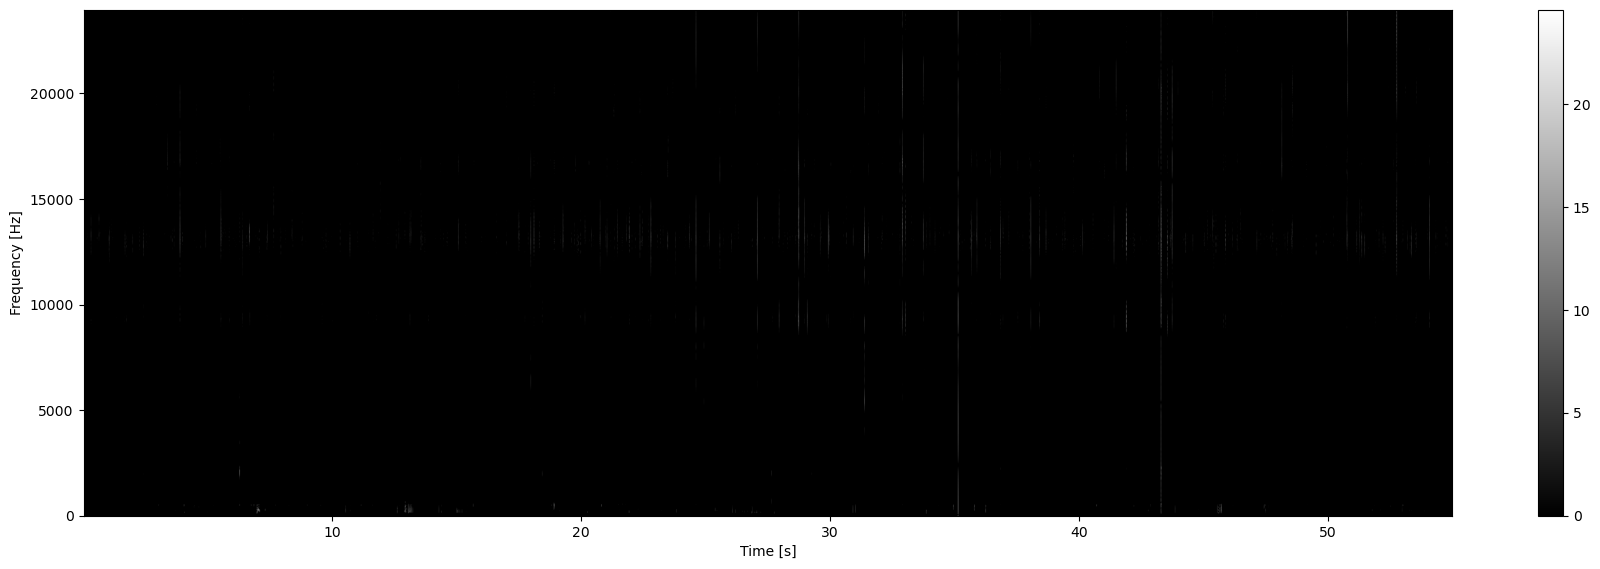

In [14]:
#Load Single File
s, fs = sound.load("C:/Users/ofsto/OneDrive/Desktop/Internship/WOPAM/Site 4.2.2/4.2.2_20211014_061700.WAV")
s_filt = sound.select_bandwidth(s, fs, fcut=100, forder=3, ftype='highpass')

db_max=70  # used to define the range of the spectrogram
Sxx, tn, fn, ext = sound.spectrogram(s_filt, fs, nperseg=1024, noverlap=512)
Sxx_db = power2dB(Sxx, db_range=db_max) + db_max
plot2d(Sxx_db, **{'extent':ext})

### 1. Find regions of interest




In [22]:
freq_threshold = 2000

def sound_under_2000hz(min_freq, max_freq):
    return max_freq <= freq_threshold

In [15]:
Sxx_db_rmbg, _, _ = sound.remove_background(Sxx_db)
Sxx_db_smooth = sound.smooth(Sxx_db_rmbg, std=1.25)
im_mask = rois.create_mask(im=Sxx_db_smooth, mode_bin ='relative', bin_std=1.3, bin_per=0.8)
im_rois, df_rois = rois.select_rois(im_mask, min_roi=50, max_roi=None)


# Format ROIs and visualize the bounding box on the audio spectrogram.
df_rois = format_features(df_rois, tn, fn)


In [16]:
df_rois

,labelID,label,min_y,min_x,max_y,max_x,min_f,min_t,max_f,max_t
0,1,unknown,0,647,13,665,0.000,6.912000,609.375,7.104000
1,2,unknown,0,1176,11,1182,0.000,12.554667,515.625,12.618667
2,3,unknown,0,1203,16,1241,0.000,12.842667,750.000,13.248000
3,5,unknown,0,2511,11,2519,0.000,26.794667,515.625,26.880000
4,6,unknown,0,2521,7,2538,0.000,26.901333,328.125,27.082667
...,...,...,...,...,...,...,...,...,...,...
310,488,unknown,473,3562,511,3568,22171.875,38.005333,23953.125,38.069333
311,490,unknown,490,3090,511,3096,22968.750,32.970667,23953.125,33.034667
312,491,unknown,492,3078,511,3084,23062.500,32.842667,23953.125,32.906667
313,493,unknown,496,4246,511,4256,23250.000,45.301333,23953.125,45.408000


In [23]:
df_rois_filtered = df_rois[df_rois.apply(lambda row: sound_under_2000hz(row['min_f'], row['max_f']), axis=1)]

In [24]:
df_rois_filtered

,labelID,label,min_y,min_x,max_y,max_x,min_f,min_t,max_f,max_t
0,1,unknown,0,647,13,665,0.000,6.912000,609.375,7.104000
1,2,unknown,0,1176,11,1182,0.000,12.554667,515.625,12.618667
2,3,unknown,0,1203,16,1241,0.000,12.842667,750.000,13.248000
3,5,unknown,0,2511,11,2519,0.000,26.794667,515.625,26.880000
4,6,unknown,0,2521,7,2538,0.000,26.901333,328.125,27.082667
5,8,unknown,0,2892,12,2898,0.000,30.858667,562.500,30.922667
6,9,unknown,0,3168,8,3174,0.000,33.802667,375.000,33.866667
9,12,unknown,0,4264,14,4286,0.000,45.493333,656.250,45.728000
10,13,unknown,1,373,13,381,46.875,3.989333,609.375,4.074667
11,14,unknown,1,982,12,988,46.875,10.485333,562.500,10.549333


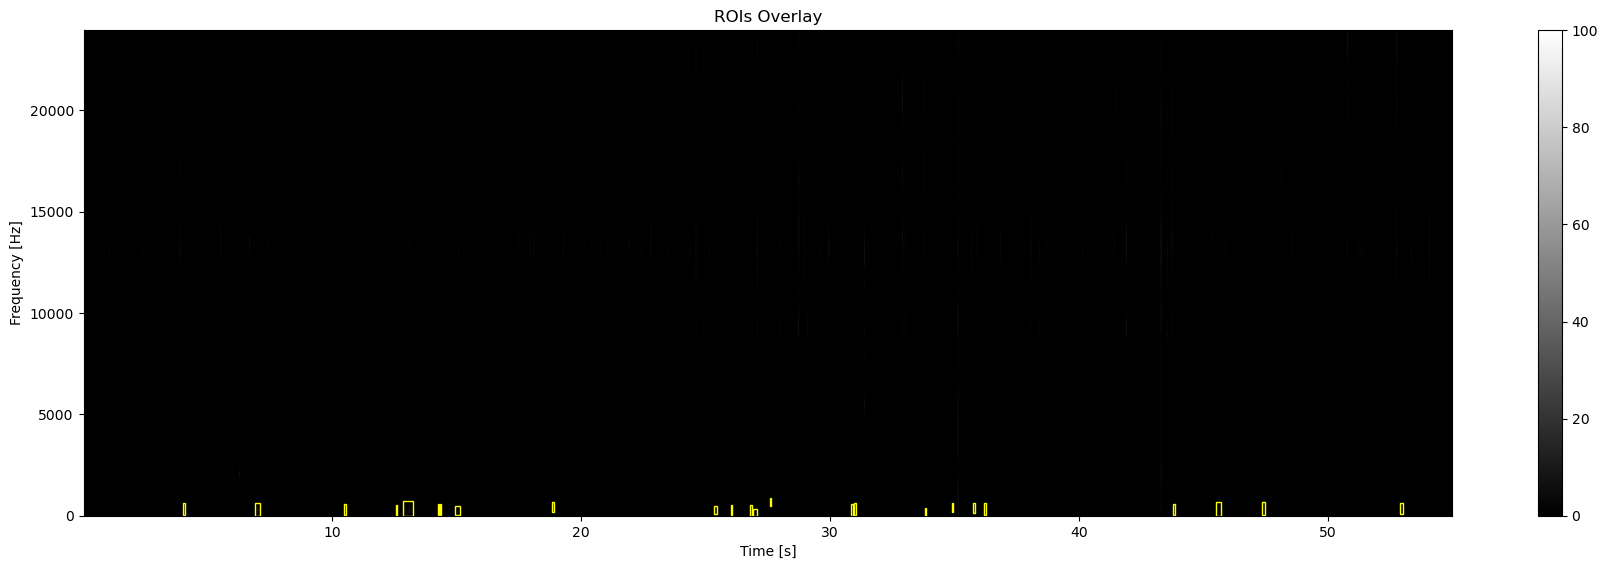

In [26]:
ax0, fig0 = overlay_rois(Sxx_db, df_rois_filtered, **{'vmin':0, 'vmax':100, 'extent':ext})


## 2. Compute acoustic features
The ``shape_feaures`` function uses bidimensional wavelets to get the texture and spectro-temporal shape coeficients of each ROI. Wavelets have the advantage of being robust when the signal-to-noise ratio is low, and derive homogeneous descriptors which facilitate the clustering process. The wavelet decomposition is performed on the complete spectrogram, hence the coeficients for ROIs do not vary much even when not the time-frequency bounds are not exact. The centroid features gives an estimate of the median frequency of the ROIs.



In [19]:
df_shape, params = features.shape_features(Sxx_db, resolution='low', rois=df_rois)
df_centroid = features.centroid_features(Sxx_db, df_rois)

# Get median frequency and normalize
median_freq = fn[np.round(df_centroid.centroid_y).astype(int)]
df_centroid['centroid_freq'] = median_freq/fn[-1]

## 3. Reduce the dimensionality of the features
The shape audio features have 26 dimensions. To facilitate the clustering process and visualize the results, it is posible to use non-metric dimensionality reduction algorithm, namely the t-distributed stochastic neighbor embedding (t-SNE), to proyect the data in two dimensions.



[t-SNE] Computing 37 nearest neighbors...
[t-SNE] Indexed 315 samples in 0.000s...
[t-SNE] Computed neighbors for 315 samples in 0.227s...
[t-SNE] Computed conditional probabilities for sample 315 / 315
[t-SNE] Mean sigma: 0.204009
[t-SNE] KL divergence after 250 iterations with early exaggeration: 58.871342
[t-SNE] KL divergence after 1000 iterations: 0.598979


Text(0, 0.5, 'tsne dim 2')

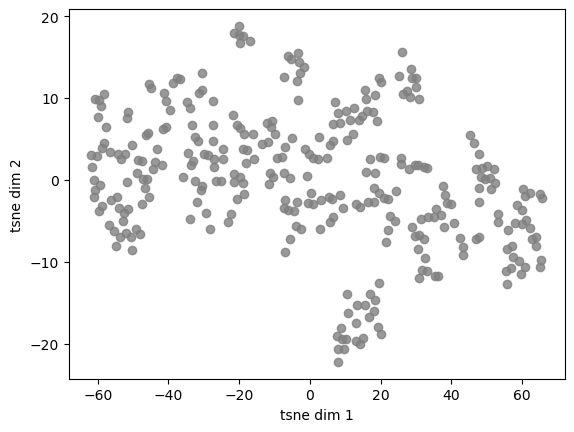

In [20]:
from sklearn.manifold import TSNE

X = df_shape.loc[:,df_shape.columns.str.startswith('shp')]
X = X.join(df_centroid.centroid_freq) # add column and normalize values

tsne = TSNE(n_components=2, perplexity=12, init='pca', verbose=True)
Y = tsne.fit_transform(X)

fig, ax = plt.subplots()
ax.scatter(Y[:,0], Y[:,1], c='gray', alpha=0.8)
ax.set_xlabel('tsne dim 1')
ax.set_ylabel('tsne dim 2')

## 4. Cluster the ROIs into homogeneous groups. 
In the above plot it is possible to observe how sounds are aggregated. It is posible to group these samples rapidly and objectively using a clustering algorithm. Here, we will use DBSCAN, a simple algorithm that allows to find core samples with high density and expands clusters from them. This algorithm has the advantage to find automatically the number of clusters and can cope with unbalanced classes.



In [25]:
from sklearn.cluster import DBSCAN
cluster = DBSCAN(eps=1, min_samples=3).fit(Y)
print('Number of soundtypes found:', np.unique(cluster.labels_).size)

Number of soundtypes found: 1


Visualize the clustering results



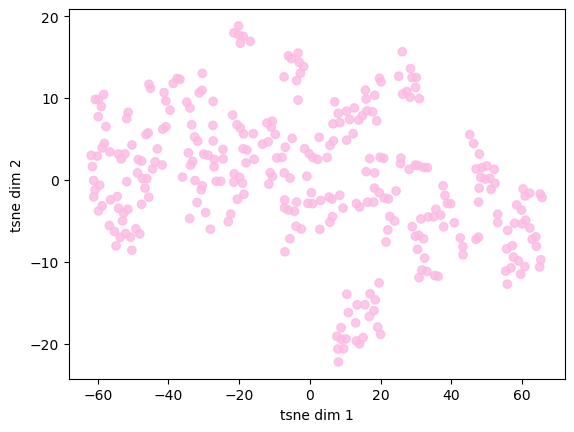

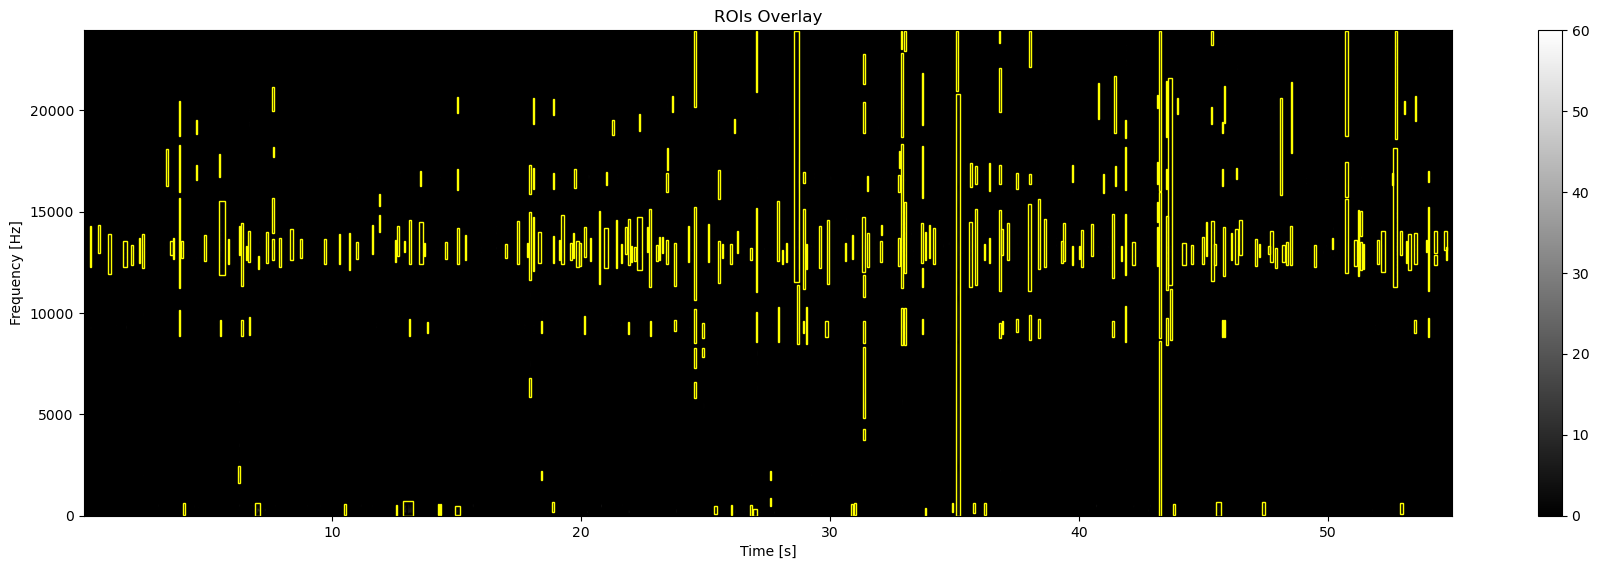

In [26]:
from maad.util import rand_cmap
fig, ax = plt.subplots()
ax.scatter(Y[:,0], Y[:,1], c=cluster.labels_, cmap=rand_cmap(5 , first_color_black=False), alpha=0.8)
ax.set_xlabel('tsne dim 1')
ax.set_ylabel('tsne dim 2')

# Overlay bounding box on the original spectrogram
df_rois['label'] = cluster.labels_.astype(str)
ax0, fig0 = overlay_rois(Sxx_db, df_rois, **{'vmin':0, 'vmax':60, 'extent':ext})

## References
1. Ulloa, J. S., Aubin, T., Llusia, D., Bouveyron, C., & Sueur, J. (2018). Estimating animal acoustic diversity in tropical environments using unsupervised multiresolution analysis. Ecological Indicators, 90, 346–355. https://doi.org/10.1016/j.ecolind.2018.03.026
2. Sifre, L., & Mallat, S. (2013). Rotation, scaling and deformation invariant scattering for texture discrimination. Computer Vision and Pattern Recognition (CVPR), 2013 IEEE Conference On, 1233–1240. http://ieeexplore.ieee.org/xpls/abs_all.jsp?arnumber=6619007
3. Maaten, L. van der, & Hinton, G. (2008). Visualizing data using t-SNE. Journal of Machine Learning Research, 9(Nov), 2579–2605.
4. Ester, M., Kriegel, H.-P., Sander, J., & Xu, X. (1996). A density-based algorithm for discovering clusters in large spatial databases with noise. Proceedings of the 2nd International Conference on Knowledge Discovery and Data Mining, 96(34), 226–231.
